In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import make_pipeline
import numpy as np
import joblib

In [2]:
data = pd.read_csv('D:\emails.csv', encoding='Latin')

In [3]:
data.head(5)

,spam,text
0,1,naturally irresistible your corporate identit...
1,1,the stock trading gunslinger fanny is merril...
2,1,unbelievable new homes made easy im wanting ...
3,1,4 color printing special request additional ...
4,1,"do not have money , get software cds from her..."


In [4]:
data['length'] = data['text'].apply(len)


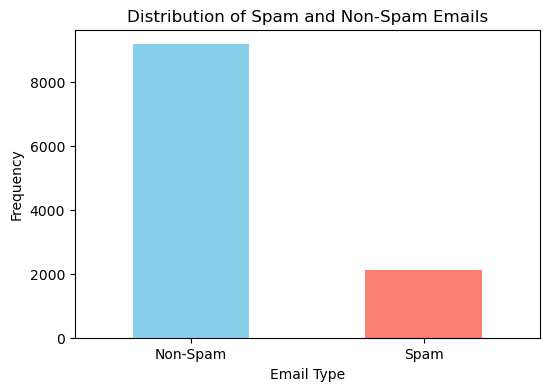

In [6]:
plt.figure(figsize=(6,4))
data['spam'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Spam and Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Non-Spam', 'Spam'], rotation=0)
plt.show()


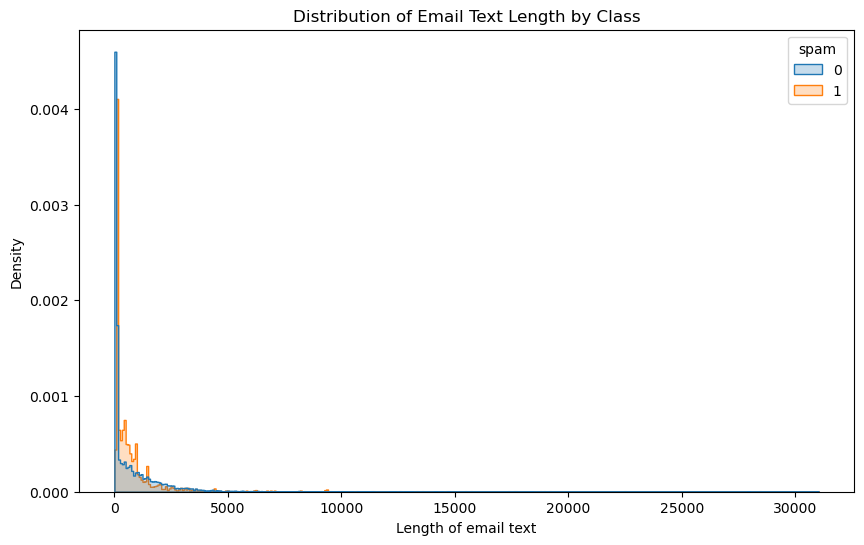

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='length', hue='spam', element='step', stat='density', common_norm=False)
plt.title('Distribution of Email Text Length by Class')
plt.xlabel('Length of email text')
plt.ylabel('Density')
plt.show()

In [15]:
pipeline = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression())])

In [16]:
cv_scores = cross_val_score(pipeline, data['text'], data['spam'], cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.95044248 0.95575221 0.95309735 0.95971669 0.93714033]
Mean CV accuracy: 0.9512298103554316


In [17]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1] 

In [18]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [19]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.9601769911504425
Confusion Matrix:
 [[1832    4]
 [  86  338]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1836
           1       0.99      0.80      0.88       424

    accuracy                           0.96      2260
   macro avg       0.97      0.90      0.93      2260
weighted avg       0.96      0.96      0.96      2260



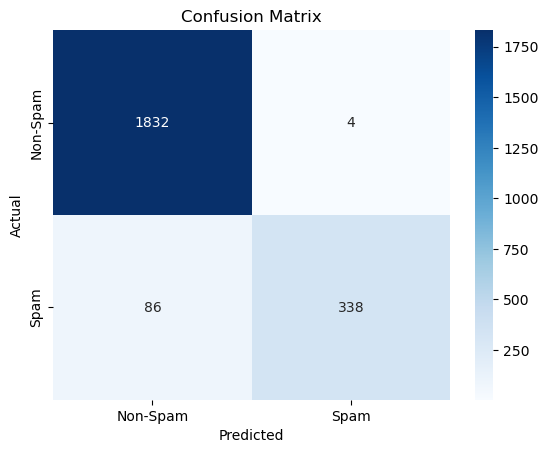

In [20]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [21]:
vectorizer = pipeline.named_steps['tfidfvectorizer']
classifier = pipeline.named_steps['logisticregression']
feature_names = vectorizer.get_feature_names_out()
feature_importances = classifier.coef_[0]
sorted_idx = np.argsort(feature_importances)

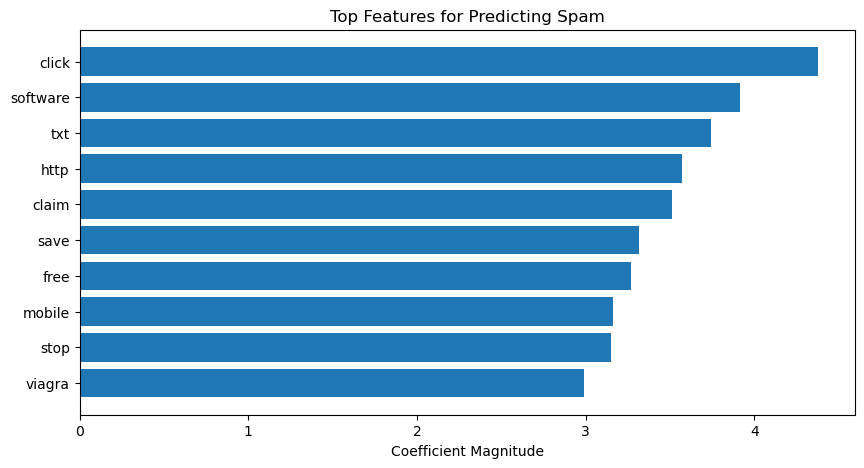

In [22]:
top_features = 10
plt.figure(figsize=(10,5))
plt.barh(range(top_features), feature_importances[sorted_idx[-top_features:]])
plt.yticks(range(top_features), feature_names[sorted_idx[-top_features:]])
plt.xlabel('Coefficient Magnitude')
plt.title('Top Features for Predicting Spam')
plt.show()

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

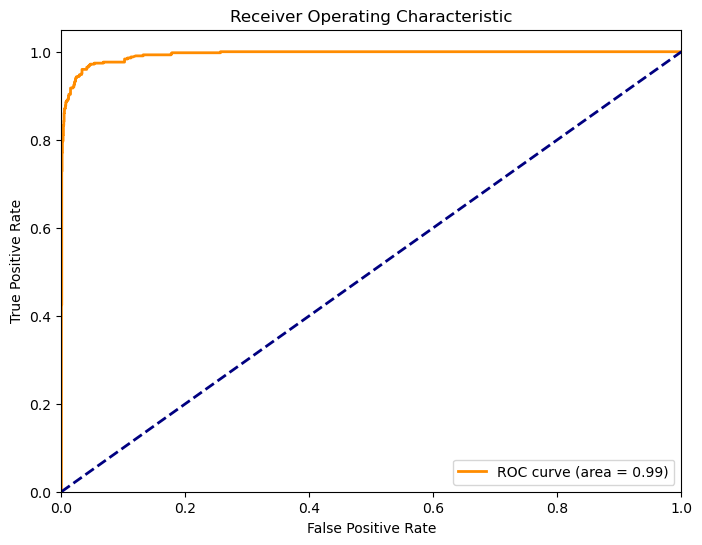

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

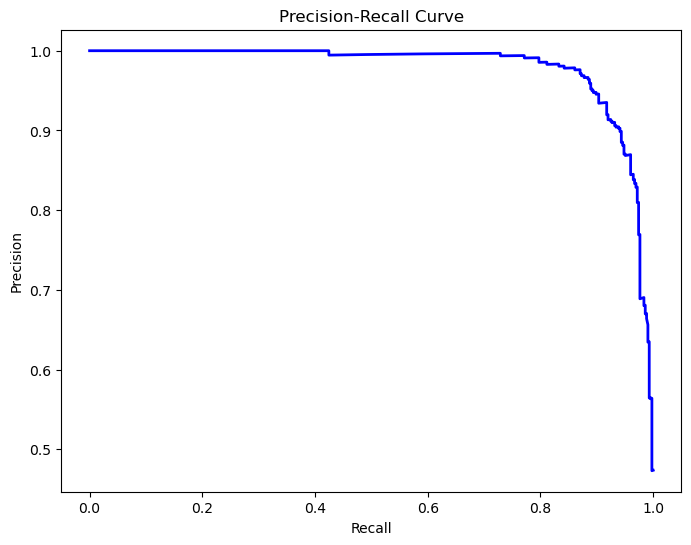

In [25]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [26]:
joblib.dump(pipeline, 'spam_classifier.joblib')

['spam_classifier.joblib']